<a href="https://colab.research.google.com/github/sid-ak/jphomevalue/blob/CD-20-Shiller-Split/shiller_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Parse the Shiller Index

Imported Data: https://github.com/sid-ak/jphomevalue/blob/main/data/shiller/TPXRSA.csv

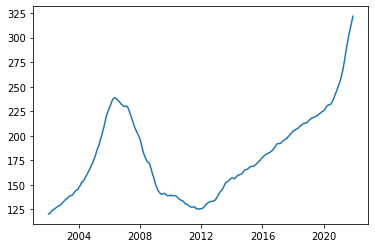

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.core.indexes.multi import MultiIndex
from google.colab import files

# Read and parse the Shiller index while setting the index as the DATE.
shiller_filePath = ""
shiller_data = pd.read_csv(shiller_filePath,
                           parse_dates = ['DATE'])

# Preserve numerical index for future use
shiller_numberedIndex = shiller_data.index.values

# Convert index to dataframe.
shiller_df = pd.DataFrame(shiller_data)
shiller_df = shiller_df.set_index('DATE')

# Plot index.
plt.plot(shiller_df)

# Downward Trend

In [240]:
# Get downward trend ranges.
downward_df = shiller_df.loc['2006-07-01' : '2012-01-01']

# Set serialized index for downward_df
downward_df = downward_df.set_index(pd.Index(
    np.arange(len(downward_df.index))), append=True)

# Swap the date and s_no
downward_indexList = list(map(lambda swap: (swap[1], swap[0]), downward_df.index))

# Convert tuples back to index.
downward_df.index = MultiIndex.from_tuples(downward_indexList, names=["s_no", "DATE"])

downward_df

,,TPXRSA
s_no,DATE,
0,2006-07-01,236.936350
1,2006-08-01,235.467191
2,2006-09-01,234.137767
3,2006-10-01,232.366403
4,2006-11-01,231.314702
...,...,...
62,2011-09-01,125.550051
63,2011-10-01,125.788805
64,2011-11-01,125.218610


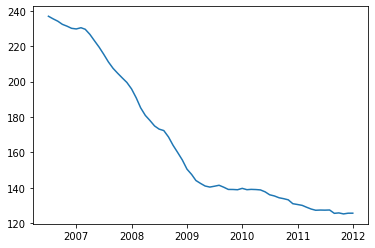

In [239]:
# Plot downward trend.
# plt.plot(downward_df)

# ATTENTION: Plotting this will no longer produce a graph because we
#            are resetting the index to a MultiIndex type for s_no.

# This is only for visualisation.

# Upward Trend

In [243]:
# Get upward trend ranges.
upward_df = shiller_df.loc['2012-02-01' : '2020-12-01']

# Set serialized index for upward_df.
upward_df = upward_df.set_index(pd.Index(
    np.arange(len(upward_df.index))), append=True)

# Swap the date and s_no.
upward_sNo = list(map(lambda swap: (swap[1], swap[0]), upward_df.index))

# Convert tuples back to index.
upward_df.index = MultiIndex.from_tuples(upward_sNo, names=["s_no", "DATE"])

upward_df

,,TPXRSA
s_no,DATE,
0,2012-02-01,126.265187
1,2012-03-01,127.055604
2,2012-04-01,128.918919
3,2012-05-01,130.370998
4,2012-06-01,131.672439
...,...,...
102,2020-08-01,235.632918
103,2020-09-01,238.226820
104,2020-10-01,241.910433


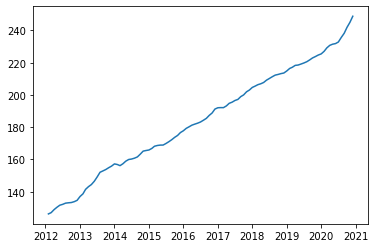

In [242]:
# Plot upward trend.
# plt.plot(upward_df)

# ATTENTION: Plotting this will no longer produce a graph because we
#            are resetting the index to a MultiIndex type for s_no.

# This is only for visualisation.

# Export to CSV and Download

In [248]:
downward_df.to_csv('shiller_downward.csv')
upward_df.to_csv('shiller_upward.csv')

files.download('shiller_downward.csv')
files.download('shiller_upward.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>